<a href="https://colab.research.google.com/github/CharleneLimKH/python-mini-projects/blob/main/Copy_of_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bias, Exercise.

In this notebook, we will aply two types of Naive Bayes on data for diffrentiation between two types of cancer.

In [38]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from google.colab import files 
from sklearn.naive_bayes import GaussianNB #we import first type of naive bayes algorithm
from sklearn.naive_bayes import MultinomialNB #PUT YOUR CODE HERE import #PUT YOUR CODE HERE #we import first type of naive bayes algorithm

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
#Upload BreastCancer.csv
Uploaded = files.upload()

Saving BreastCancer.csv to BreastCancer (4).csv


In [57]:
#Read the data into pandas data frame
df = pd.read_csv('BreastCancer.csv')
df.info
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed_32'],
      dtype='object')


In [58]:
# Drop irrelevant columns
df.drop(['id', 'Unnamed_32'], axis=1, inplace=True)

In [68]:
dfMean = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
dfSE = df[['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'fractal_dimension_se']]
dfWorst = df[['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]   


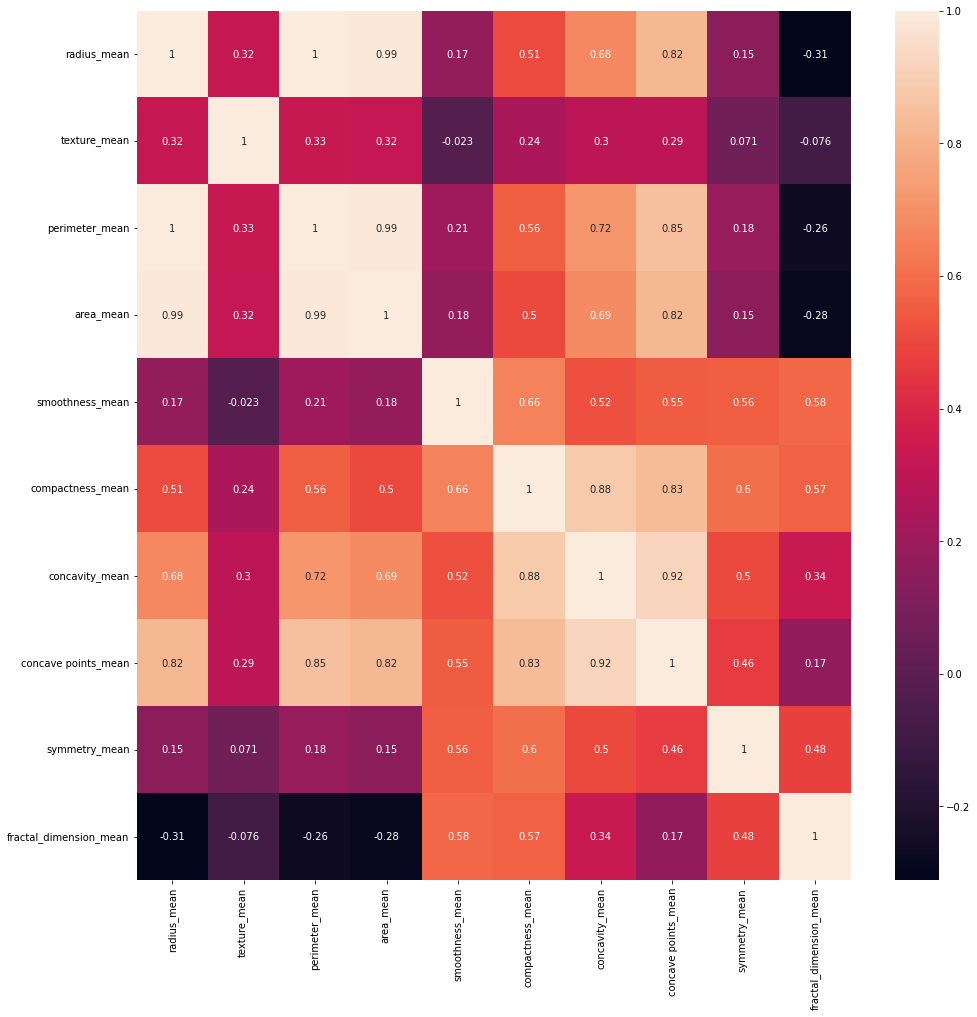

In [91]:
#create a meaningful correlation plot using sns
plt.pyplot.figure(figsize=(16,16))
dataplot=sns.heatmap(dfMean.corr(),annot=True) #Mean

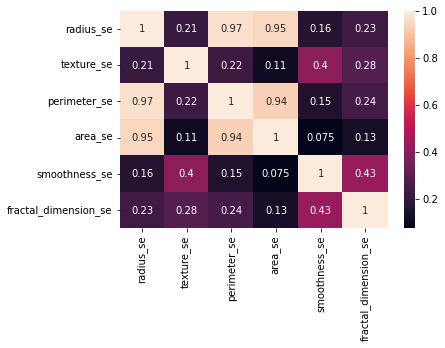

In [70]:
dataplot=sns.heatmap(dfSE.corr(),annot=True) #SE

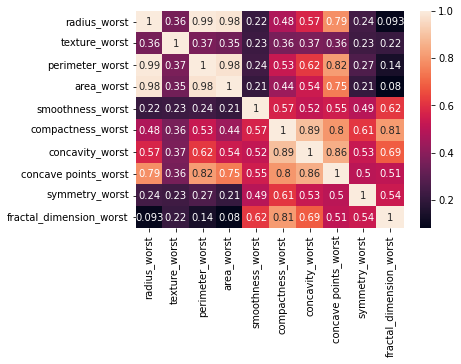

In [71]:
dataplot=sns.heatmap(dfWorst.corr(),annot=True) #Worst

In [ ]:
#Read the data into pandas data frame
df = pd.read_csv('BreastCancer.csv')
df.info

<bound method DataFrame.info of            id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27

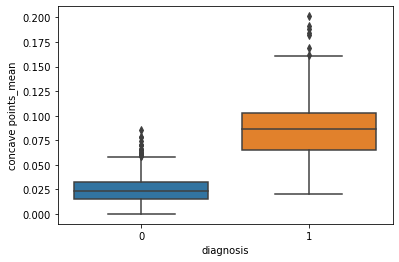

In [76]:
#Pick one parameter each time and plot the box plots of both groups against the diagnosis 
sns.boxplot(x='diagnosis', y='concave points_mean', data=df)

In [88]:


X = df.drop('diagnosis', axis=1) #Drop the diagnosis from the original data frame and save it to X
y = df['diagnosis'] #Save the diagnosis from the original data frame into y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)  #Split your data with 70%/30% train/test sets
model = GaussianNB()
model.fit(X_train, y_train)
prediction = model.predict(X_test)



In [85]:
X = df.drop('diagnosis', axis=1) #Drop the diagnosis from the original data frame and save it to X
y = df['diagnosis'] #Save the diagnosis from the original data frame into y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)  #Split your data with 70%/30% train/test sets
model = MultinomialNB()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [89]:
print(confusion_matrix(y_test, prediction))

[[104   4]
 [  6  57]]


In [90]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       108
           1       0.93      0.90      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

